# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

# Algorithms to use
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!jupyter nbconvert --to html /content/Learner_Notebook_Full_Code_Version_Potential_Customers_Prediction.ipynb

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Loading the dataset
df = pd.read_csv('data/ExtraaLearn.csv')

In [ ]:
df.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [ ]:
# Let us see the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations:**

- There are **4612 observations and 15 columns** in the dataset.
- All the columns have 4612 non-null values, i.e., **there are no missing values in the data.**

**Let's check the unique values in each column**

In [ ]:
# Checking unique values in each column
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


**Observations:**

- **The ID varaible is an identifier** which is unique for each employee and **we can drop this column** as it would not add any value to our analysis.

**Let's drop the columns mentioned above** and define lists for numerical and categorical columns to explore them separately. Since the "status" variable is the target class that we want to predict, we consider "status" variable also as categorical even though it is numerical in the dataset.

In [ ]:
# Dropping the columns
df=df.drop(['ID'],axis=1)

In [ ]:
# Identifying categorical variable in the dataset
categorical = df.select_dtypes(include=object)
categorical.columns
for cols in categorical.columns:
  print(df[cols].unique()[:3])

['Unemployed' 'Professional' 'Student']
['Website' 'Mobile App']
['High' 'Medium' 'Low']
['Website Activity' 'Email Activity' 'Phone Activity']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [ ]:
# Creating categorical variables
cat_cols= list(categorical.columns)
cat_cols.append("status")

# Creating numerical columns
num_cols = list(df.columns)
[num_cols.remove(k) for k in cat_cols]
{"CATEGORICAL": cat_cols, "NUMERICAL":num_cols}

{'CATEGORICAL': ['current_occupation',
  'first_interaction',
  'profile_completed',
  'last_activity',
  'print_media_type1',
  'print_media_type2',
  'digital_media',
  'educational_channels',
  'referral',
  'status'],
 'NUMERICAL': ['age',
  'website_visits',
  'time_spent_on_website',
  'page_views_per_visit']}

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

### **Univariate analysis of numerical columns**

In [ ]:
# Checking summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434


**Observations:**

- **The lead average age is around 46 years**. And, 75% of the lead is 57 years old or less. Besides, the age  has a range from 18 years to 63, indicating a good age diversity in the lead.
- **The average time spent on the website per lead is around 743 seconds (more than 12 minutes)** with a very large standard deviation. These values indicate that  on average, a lead spend a sheer amount of time (more than 12 minutes) on the website once visited.

- **The average number of page view per visit is around 3**. It range from 0 to 18.
- **The average website visits is around 3**. It range from 0 to 30, indicating that there are some extreme values.

**Let's explore these variables in some more depth by observing their distributions**

age
Skew : -0.72


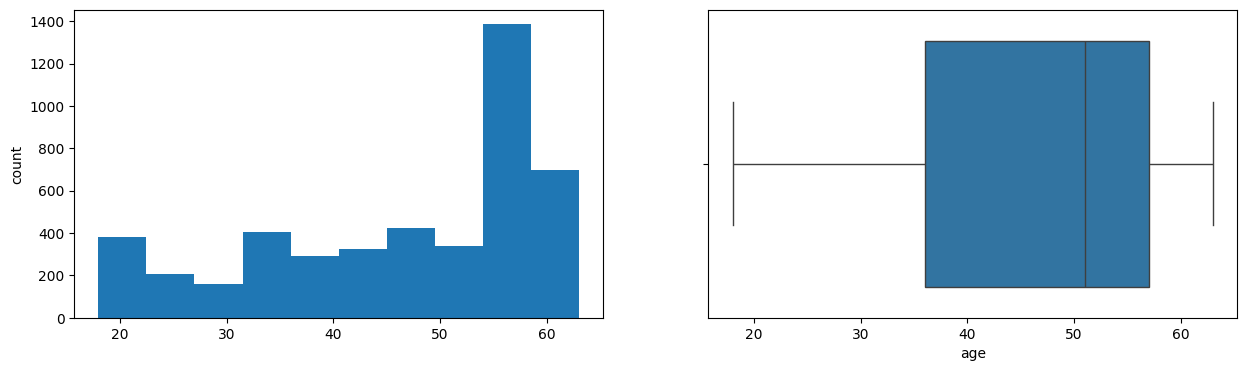

website_visits
Skew : 2.16


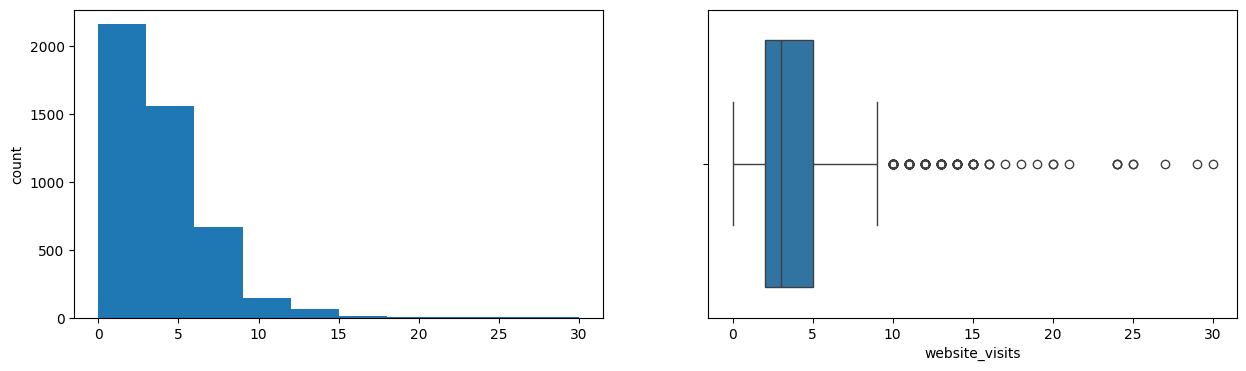

time_spent_on_website
Skew : 0.95


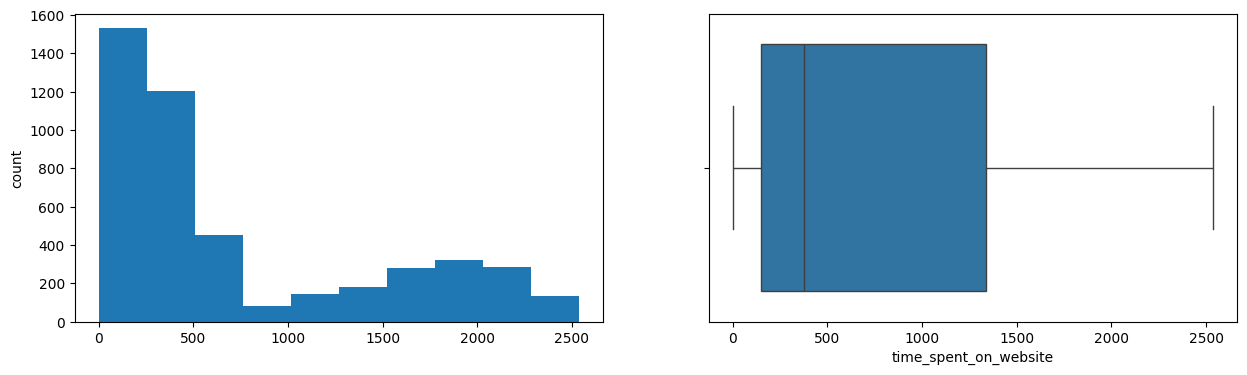

page_views_per_visit
Skew : 1.27


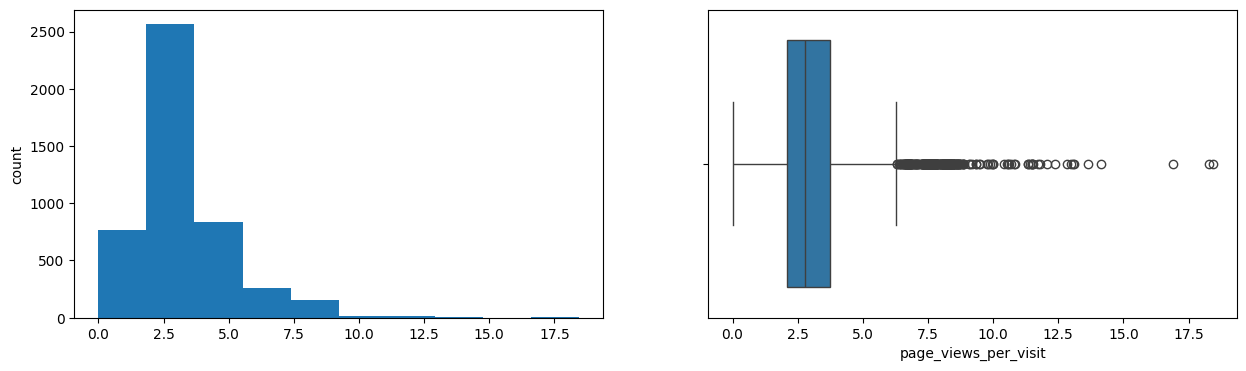

In [ ]:
# Creating histograms
# df[num_cols].hist(figsize=(14,14))
# plt.show()
# Write your code here
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)

    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.show()

**Observations:**

- **The age distribution is left skew** with the majority of lead has age between the ages of 18 and 57.

- **The website_visits and the page_views_per_visit distribution are highly right skew.** This can also be observed from their boxplots where many outliers are present.
- **The time_spent_on_website distribution is right skew** with the majority of lead has spent a time between 0 and 1336 on the website.

### **Univariate analysis for categorical variables**

In [ ]:
df.columns

Index(['age', 'current_occupation', 'first_interaction', 'profile_completed',
       'website_visits', 'time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral', 'status'],
      dtype='object')

In [ ]:
s= df.status.value_counts()
ps = s.to_frame()
ps["proportion"]=list(df.status.value_counts(normalize=True))
ps

,count,proportion
status,,
0,3235,0.701431
1,1377,0.298569


In [ ]:
# Printing the % sub categories of each category
for i in cat_cols:
    print(df[i].value_counts(normalize=True))
    print('*'*32)

current_occupation
Professional    0.567216
Unemployed      0.312446
Student         0.120338
Name: proportion, dtype: float64
********************************
first_interaction
Website       0.551171
Mobile App    0.448829
Name: proportion, dtype: float64
********************************
profile_completed
High      0.490893
Medium    0.485906
Low       0.023200
Name: proportion, dtype: float64
********************************
last_activity
Email Activity      0.493929
Phone Activity      0.267563
Website Activity    0.238508
Name: proportion, dtype: float64
********************************
print_media_type1
No     0.892238
Yes    0.107762
Name: proportion, dtype: float64
********************************
print_media_type2
No     0.94948
Yes    0.05052
Name: proportion, dtype: float64
********************************
digital_media
No     0.885733
Yes    0.114267
Name: proportion, dtype: float64
********************************
educational_channels
No     0.847138
Yes    0.152862
Name: p

**Observations:**

- **The lead conversion rate is 29.85%.**
- **Around 55.11%** of the lead got their first interaction via a website, while the remaining ones (44.89) via a mobile app. This suggest that both modes are relevant when attracting leads, with a lil bit advantage for the website.  
- **Around 15%** of the lead has heard about ExtraaLearn via an educational channels. This number is the highest among all the available modes of interactions, suggesting that this interaction mode allow reaching out to more lead.
- **Around 11%, 10%, 5%** of the lead have seen the ad of ExtraaLearn via a digital media, the newspaper and a magazine respectively.
- **Around 2%** of the lead has heard about ExtraaLearn via a reference. This number is the lowest among all the available modes of interactions, suggesting the inadequacy of this mode of interaction.

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables. Let's now check how does the leads status is related with other categorical variables.

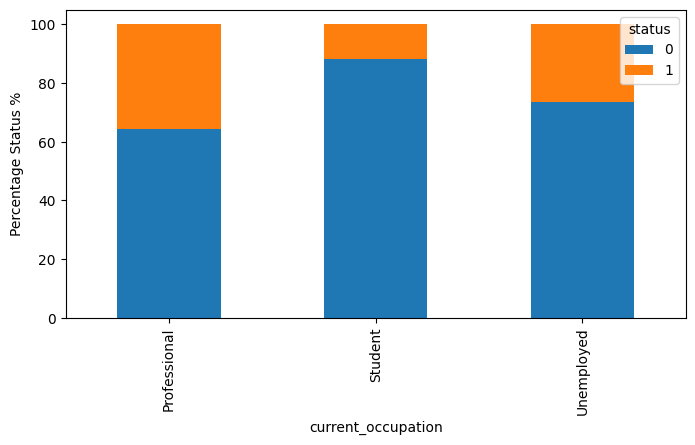

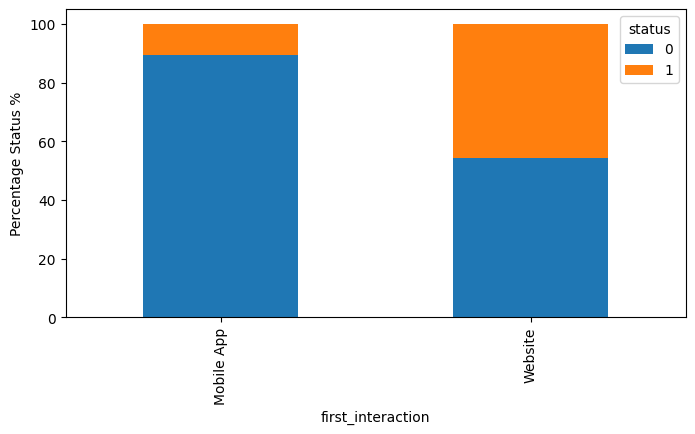

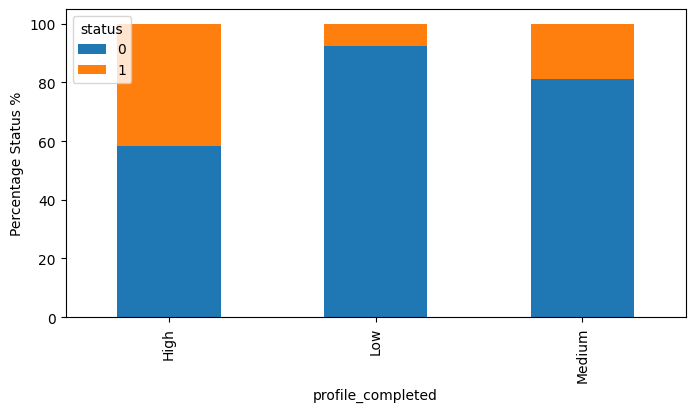

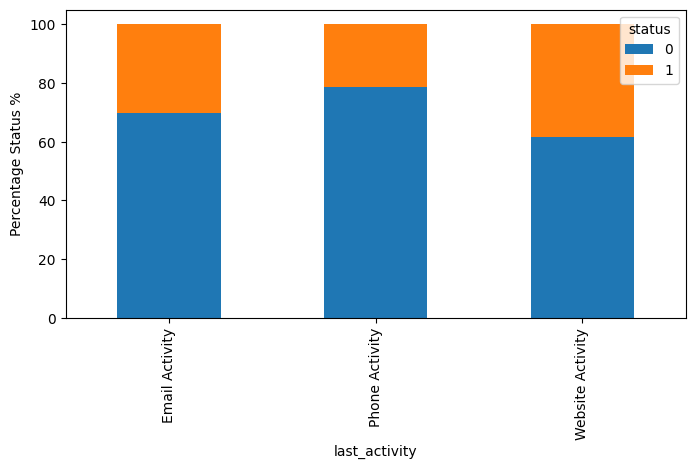

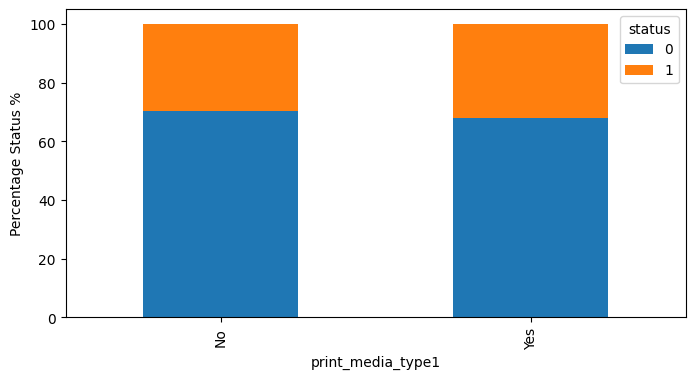

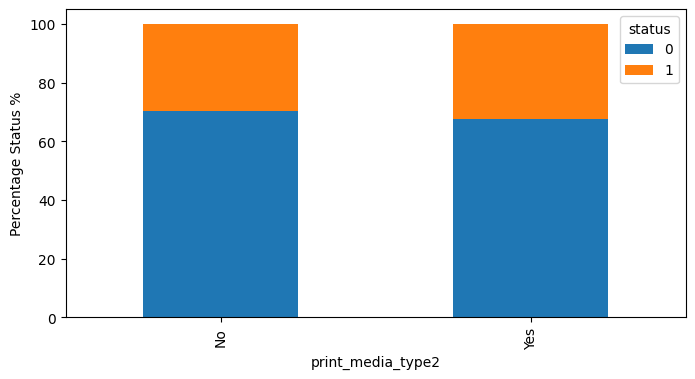

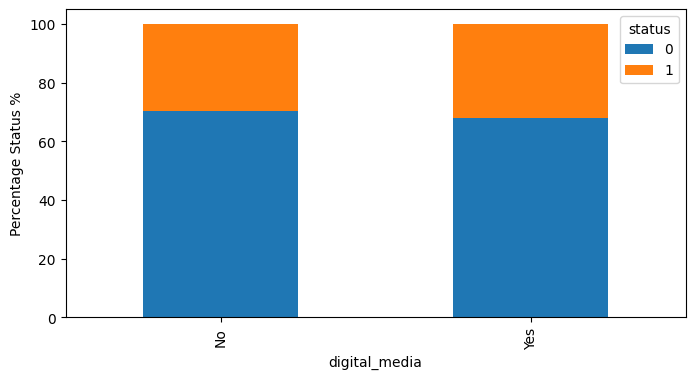

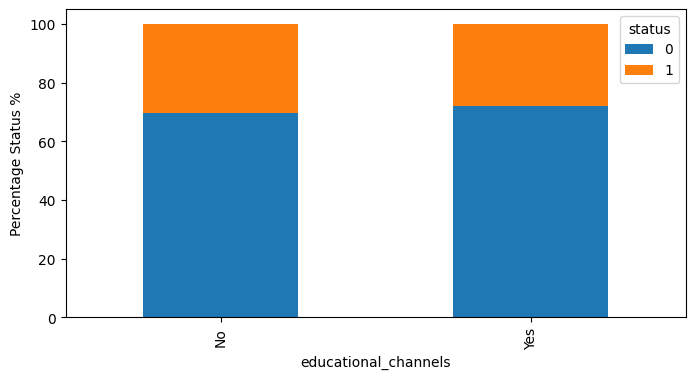

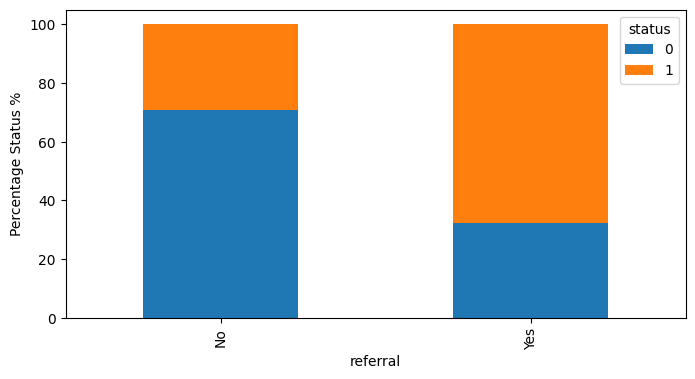

In [ ]:
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage Status %')

**Observations:**

- **Around 25%** of leads with a profession tend to convert to paid customers, follows by unemployed and students leads. This indicates that the lead occupation is a factor of lead conversion to paid customers.

- **Around 50%** of leads whose first interaction is via website get converted to paid customers, against only 10% for the mobile app. This indicates that website as a first channel of interaction significantly increases the likleihood of the lead to be converted into a paid customers.
- **Around 40%** of leads who has completed at leat 75% of their profile information is converted to a paid customers, follows by leads with at least 50%, and less than 50% completion that got a convertion rate of ~19% and ~5% , respectively. This indicates that higher profile completion percentage increases the likelihood of a lead to be converted to a paid customer.

- **Around 38%** of leads whose last activity with ExtraaLearn is via website is converted to paid customers, follows by ~30% and ~20% for email and phone ones, respectively.

- **Around 30%** of leads who has seen ad via the newsletter/the magazine/the digital media/educational channels is converted to a paid customers. Similar proportion (i.e., ~28%) is observed for lead who has not seen add from the aforementionned platforms. This indicates that seeing ad or not from newsletter, the magazine, the digital media, educational channels is likely to not be a sharp preditor of the convertion of a lead to a paid customers.

- **Lead from referral has 70%** of chance to be converted to paid customers. This a very high convertion rate, however, from our previous analyis very few (i.e., 2%) leads were obtained via referral.




**Let's check the relationship between Status and Numerical variables**

In [ ]:
# Mean of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].mean()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,45.153014,3.578980,577.420711,3.025732
1,48.663762,3.538126,1068.397967,3.027050


In [ ]:
# Median of numerical variables grouped by attrition
df.groupby(['status'])[num_cols].median()

,age,website_visits,time_spent_on_website,page_views_per_visit
status,,,,
0,49.0,3.0,317.0,2.706
1,54.0,3.0,789.0,2.935


**Observations:**
- **Leads who are converted into paid customers spent on average 1068 seconds on the website for only 577 for those who are not.** The discrepancy between theses values is very large (i.e, 491) suggesting that the time spent on the website is likely to be a sharp predictor of the lead convertion. Moreover, this tendency is further confirm from the median perspective. The reason may be that leads who are really interested into the course spend more time going through the courses specifications and related details, resulting on larger time spending on the website.
- **Lead who are converted into paid customers has an average age of 54, against 45 for those who are not**. It seems that older leads are likely to be paid customers.


### **Let's check the relationship between different numerical variables**

<Axes: >

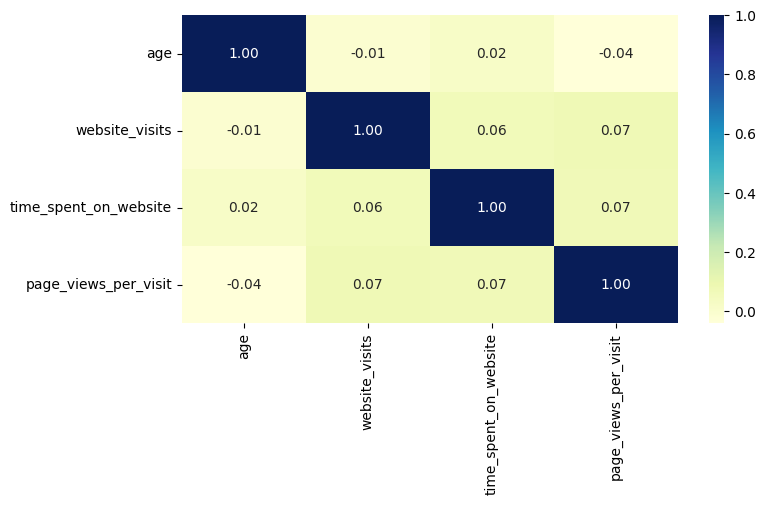

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize=(8,4))
sns.heatmap(df[num_cols].corr(),annot=True, fmt='0.2f', cmap='YlGnBu')

**Observations:**

- **There is no significant correlation between the numerical variables**. This suggest that from the numerical variables perspective, there are close to zero redundant predictors in our data.

### **Model Building - Approach**

1. Data preparation.
2. Partition the data into a train and test set.
3. Build a model on the train data.
4. Tune the model if required.
5. Test the data on the test set.

### **Data preparation**

**Creating dummy variables for categorical Variables**

In [ ]:
# Identifying categorical variable in the dataset
dict_cat_cols = {}
for cols in cat_cols:
  if cols != "status":
    dict_cat_cols[cols]=df[cols].unique()[:3]
    print(cols , dict_cat_cols[cols], len(dict_cat_cols[cols]))

current_occupation ['Unemployed' 'Professional' 'Student'] 3
first_interaction ['Website' 'Mobile App'] 2
profile_completed ['High' 'Medium' 'Low'] 3
last_activity ['Website Activity' 'Email Activity' 'Phone Activity'] 3
print_media_type1 ['Yes' 'No'] 2
print_media_type2 ['No' 'Yes'] 2
digital_media ['Yes' 'No'] 2
educational_channels ['No' 'Yes'] 2
referral ['No' 'Yes'] 2


In [ ]:
# Creating list of dummy columns
to_get_dummies_for = [k for k, v in dict_cat_cols.items() if len(v)>2 ]
# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for,drop_first=True)


df['referral'] = df.referral.map({'Yes': 1, 'No':0})
df['educational_channels'] = df.educational_channels.map({'Yes': 1, 'No':0})
df['digital_media'] = df.digital_media.map({'Yes': 1, 'No':0})
df['print_media_type2'] = df.print_media_type2.map({'Yes': 1, 'No':0})
df['print_media_type1'] = df.print_media_type1.map({'Yes': 1, 'No':0})
df['first_interaction'] = df.first_interaction.map({'Website': 1, 'Mobile App':0})
to_get_dummies_for

['current_occupation', 'profile_completed', 'last_activity']

In [ ]:
# Separating target variable and other variables
Y= df.status
X= df.drop(columns = ['status'])

# printing proportion of target variable
s= df.status.value_counts()
ps = s.to_frame()
ps["proportion"]=list(df.status.value_counts(normalize=True))
ps


,count,proportion
status,,
0,3235,0.701431
1,1377,0.298569


**Splitting the data into 70% train and 30% test set**

This classification problems exhibit a large imbalance in the distribution of the target classes. In such cases it is recommended to use the **stratified sampling** technique to ensure that relative class frequencies are approximately preserved in each train and validation fold.

In [ ]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [ ]:
X_train.shape

(3228, 16)

In [ ]:
X_test.shape

(1384, 16)

### **Scaling the data**

In [ ]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a lead will convert in paid customers when the lead does not
2. Predicting a lead will not convert in paid customers when the lead actually converts

**Which case is more important?**

* **Predicting that the employee will convert to paid customers but the employee does not**, i.e., losing out resources spent on marketing strategy. This would be considered a major miss, especially for an initial stage start up.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The start up would want the precision to be maximized**, the greater the Precision, the higher the chances of minimizing false positives. Hence, the focus should be on increasing the Precision (minimizing the false positives) or, in other words, identifying the true negatives (i.e. Class 0) very well.

In [ ]:
# Creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

### **Decision Tree**

* We will build our model using the **DecisionTreeClassifier function.**
* Since the frequency of class A is 70.15% and the frequency of class B is 29.85%, then class B will become the dominant class and **the decision tree will become biased toward the dominant class.**
* **class_weight is a hyperparameter** for the decision tree classifier, and in this case, we can pass a dictionary {0:0.7015, 1:0.2985} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

In [ ]:
s= df.status.value_counts()
ps = s.to_frame()
ps["proportion"]=list(df.status.value_counts(normalize=True))
ps

,count,proportion
status,,
0,3235,0.701431
1,1377,0.298569


In [ ]:
# Building decision tree model
dt = DecisionTreeClassifier(class_weight = {0: 0.7015, 1: 0.2985}, random_state = 1)

In [ ]:
# Fitting decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.7015, 1: 0.2985}, random_state=1)

**Let's check the model performance of decision tree**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



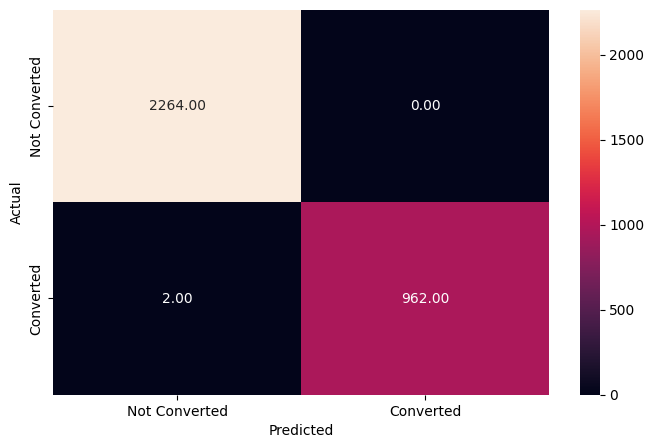

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = dt.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       971
           1       0.66      0.67      0.66       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384



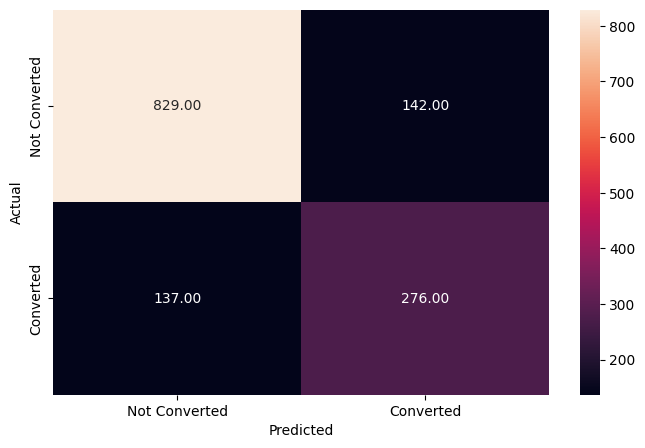

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = dt.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observation:**

- The Decision tree is giving a **100% score for all metrics on the training dataset.** This indicates that the model is overfitting the data.

**Observations:**

- The Decision Tree works well on the training data but **not so well on the test data** as the precision is 0.66 in comparison to 1 for the training dataset, i.e., the Decision Tree is overfitting the training data.
- The recall on the test data suggests that there's a 33% (1 - 0.67) chance that the model will predict that a lead will not be converted in paid customers even though he/she would.

**Let's plot the feature importance and check the most important features.**

<Axes: xlabel='Importance', ylabel='None'>

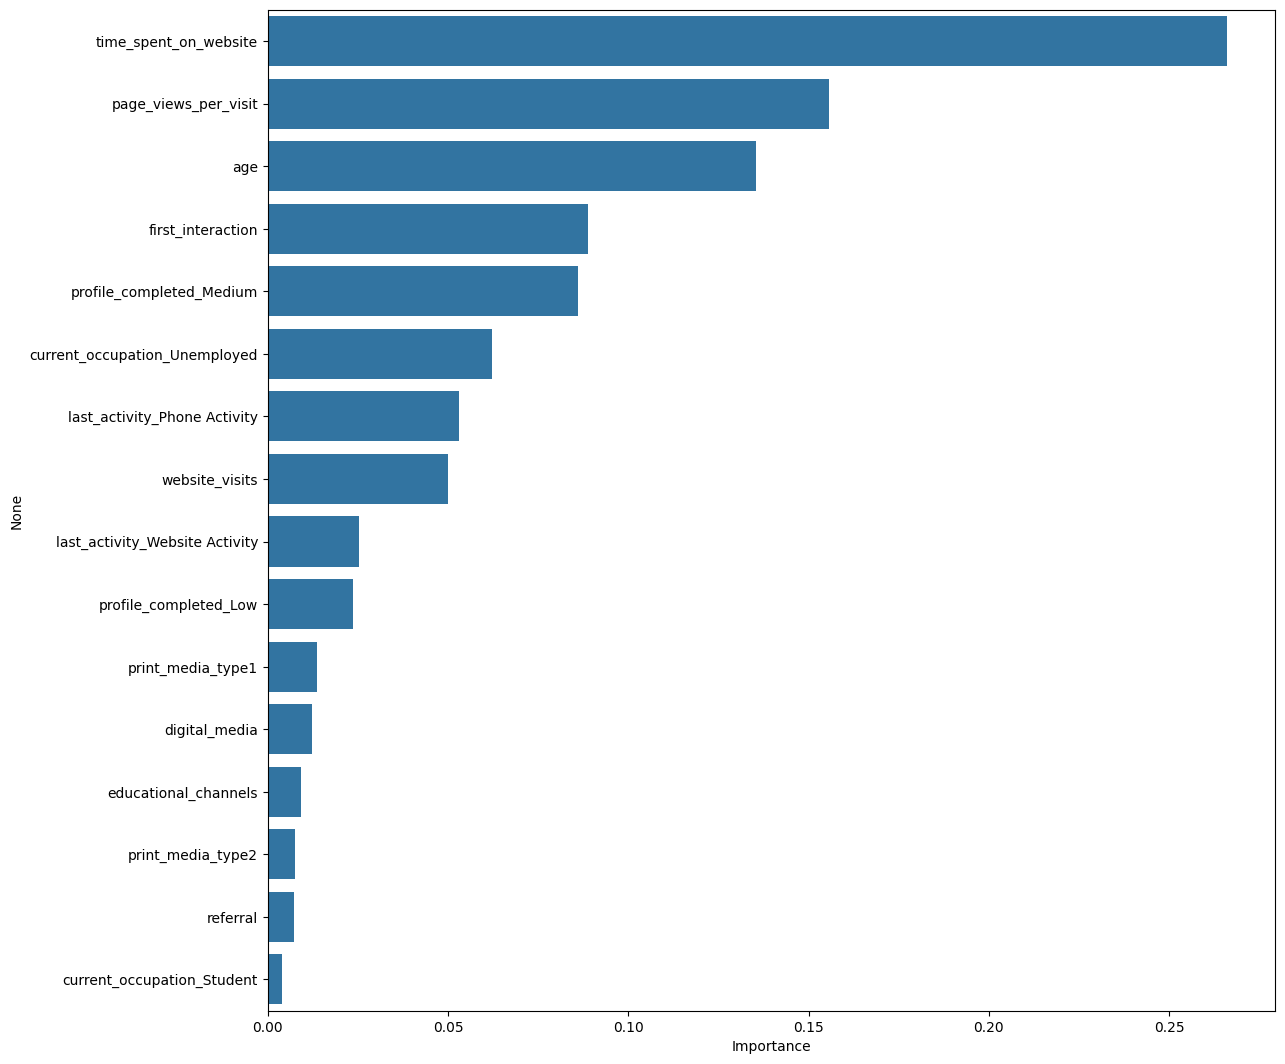

In [ ]:
# Plot the feature importance
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))

#sns.barplot(importance_df.Importance,importance_df.index)
sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**

- According to the Decision Tree, **time_spent_on_website is the most important feature, followed by page_views_per_visit, Age, first_interaction, and profile_completed_medium.**
- This might signify leads who are likely to convert in paid customers have spent more time on the website, are old and have completed at leat 50% of their profile information.
- The other important features are `current_occupation_unemployed`, `last_activity_phone `, and `website_visits`.

## Do we need to prune the tree?

Since the model has a perfect score on the training set. It is overfitting the data. Thus, pruning is required.

In [ ]:
clf = DecisionTreeClassifier(class_weight = {0: 0.7015, 1: 0.2985}, random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

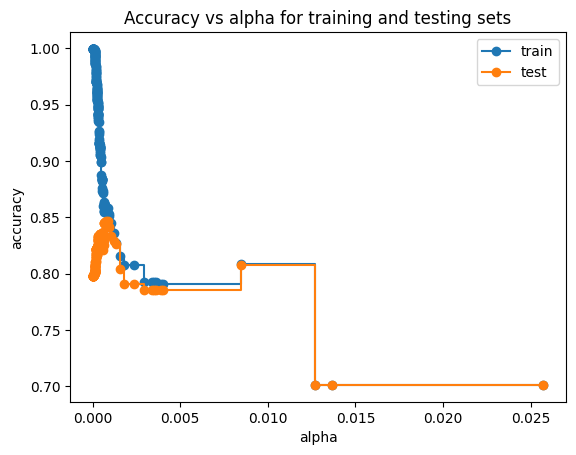

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(class_weight = {0: 0.7015, 1: 0.2985}, random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 4. Determine the best alpha
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# Choose the alpha that maximizes test accuracy
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]

# 5. Prune the tree with the best alpha
final_clf = DecisionTreeClassifier(class_weight = {0: 0.7015, 1: 0.2985}, random_state=1, ccp_alpha=best_alpha)
final_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0007487716383993219),
                       class_weight={0: 0.7015, 1: 0.2985}, random_state=1)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2264
           1       0.89      0.60      0.72       964

    accuracy                           0.86      3228
   macro avg       0.87      0.79      0.81      3228
weighted avg       0.86      0.86      0.85      3228



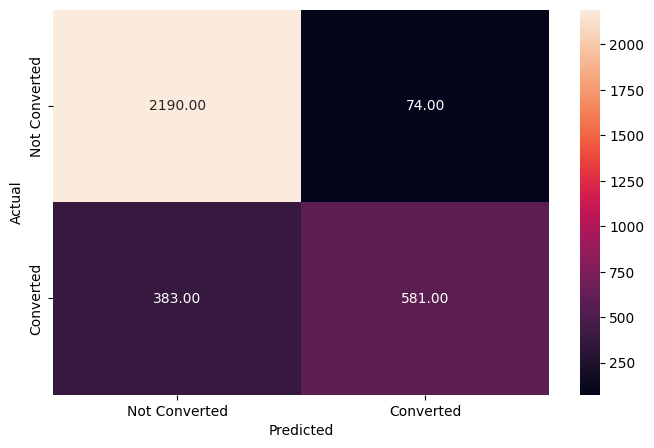

In [ ]:
# Checking performance on the training dataset
y_train_pred_dt = final_clf.predict(X_train)
metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       971
           1       0.87      0.57      0.69       413

    accuracy                           0.85      1384
   macro avg       0.86      0.77      0.79      1384
weighted avg       0.85      0.85      0.84      1384



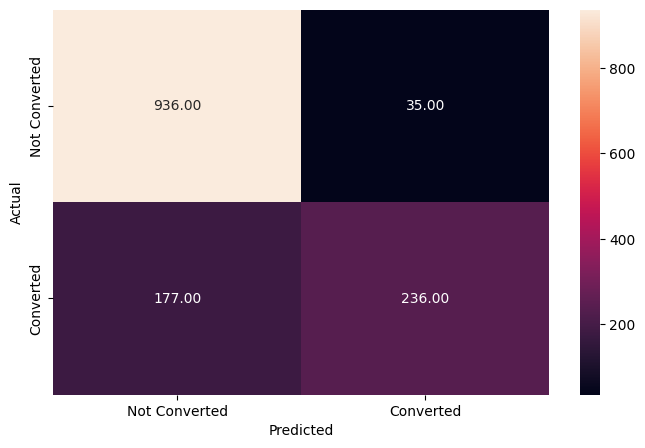

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = final_clf.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observation:**

- For all the metrics in the training dataset, the pruned decision tree gives an acuracy of 86% score. On the test set the pruned model achieved an accuracy of 85%. This shows that the pruning has been effective by reducing the risk of overfitting.

**Observations:**

- The pruned Decision Tree works well on the training data, and  **also well on the test data** as the precision is 87% in comparison to 89% for the training dataset. Thus, The model has **similar performance on the test and train data**, therefore we're confident that the model is generalising.


**Let's plot the feature importance and check the most important features.**

<Axes: xlabel='Importance', ylabel='None'>

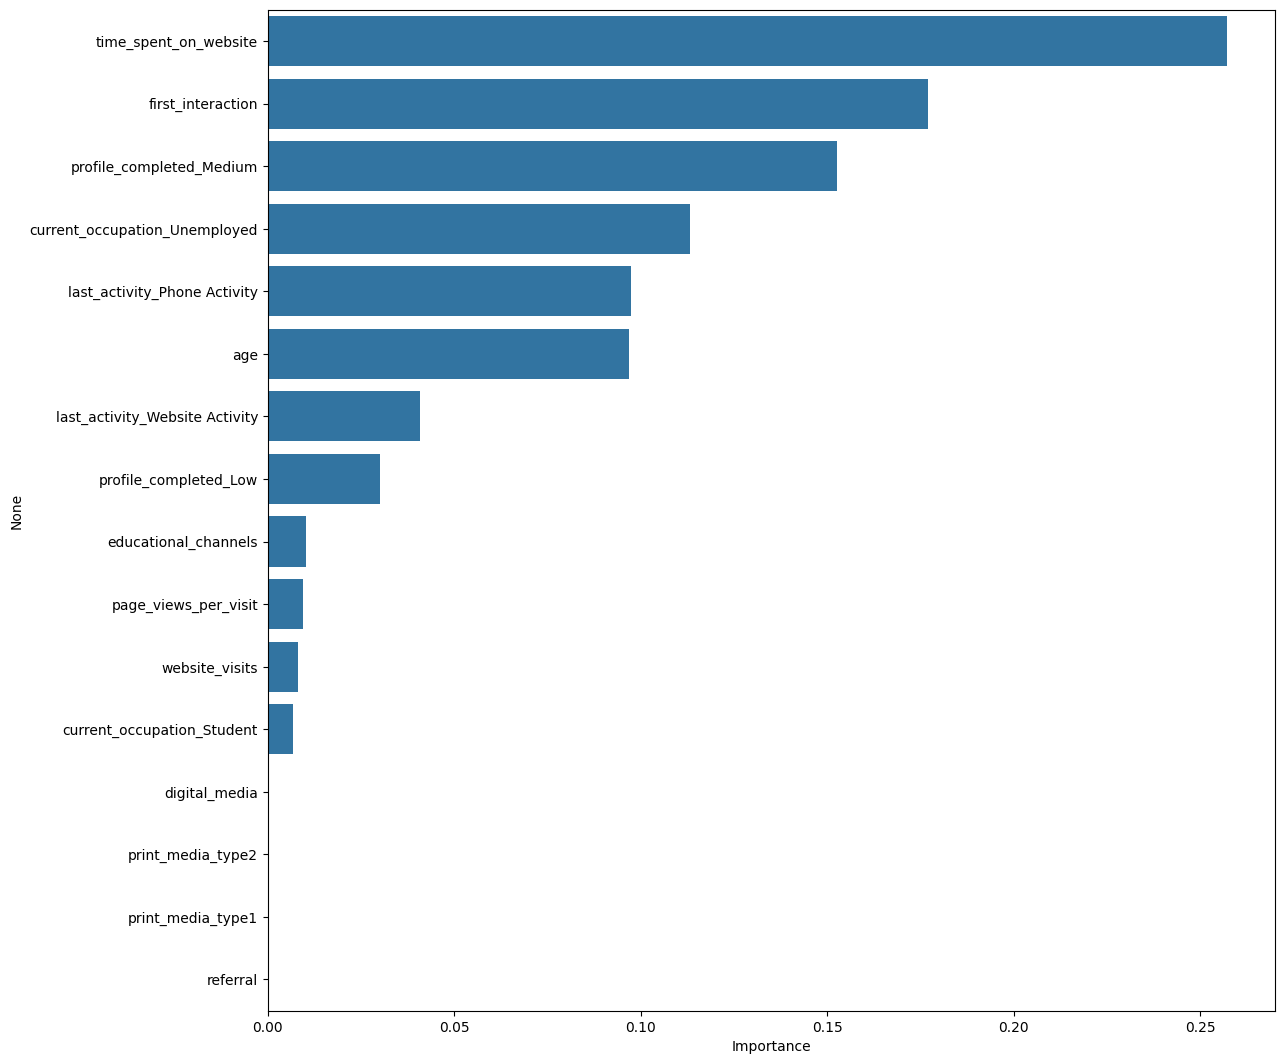

In [ ]:
# Plot the feature importance
importances = final_clf.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))

#sns.barplot(importance_df.Importance,importance_df.index)
sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**

- According to the pruned Decision Tree, **time_spent_on_website is the most important feature, followed by first_interaction, Profile_completed_medium, current_occupation_Unemployed, and last_activity_Phone.**
- This might signify leads who are likely to convert in paid customers have spent more time on the website, have first interaction via the website, are unemployed and have completed at leat 50% of their profile information.
- The other important features are `Age`, `last_activity_website `, and `profile_completed_low`.
- It is worth noting that per our univariate analysis about the categorical varibale, the  digital_media, the print_media_type1, print_media_type2 and referral do not impact the likelihood of the leads to be converted.

## Building a Random Forest model

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.7015, 1: 0.2985}, random_state = 42)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.7015, 1: 0.2985}, random_state=42)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



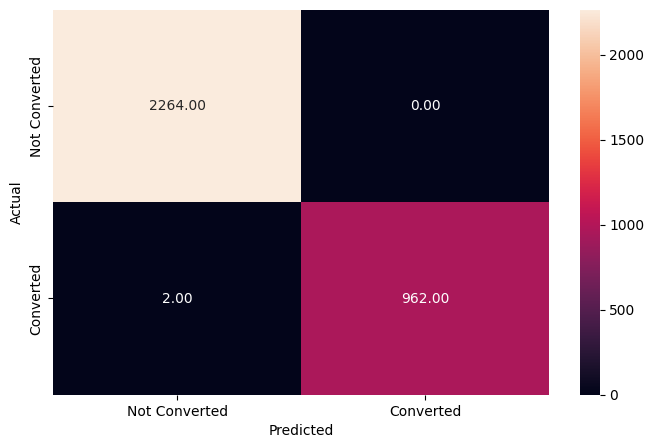

In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.78      0.73      0.75       413

    accuracy                           0.86      1384
   macro avg       0.83      0.82      0.83      1384
weighted avg       0.86      0.86      0.86      1384



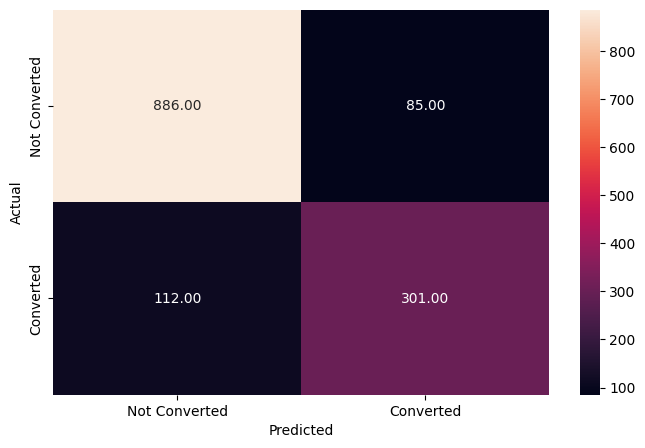

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = rf_estimator.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The Random Forest classifier **seems to be overfitting the training data**. The precision on the training data is 1, while the precision on the test data is only ~ 0.78 for class 1.


**Let's check the feature importance of the Random Forest**

<Axes: xlabel='Importance', ylabel='None'>

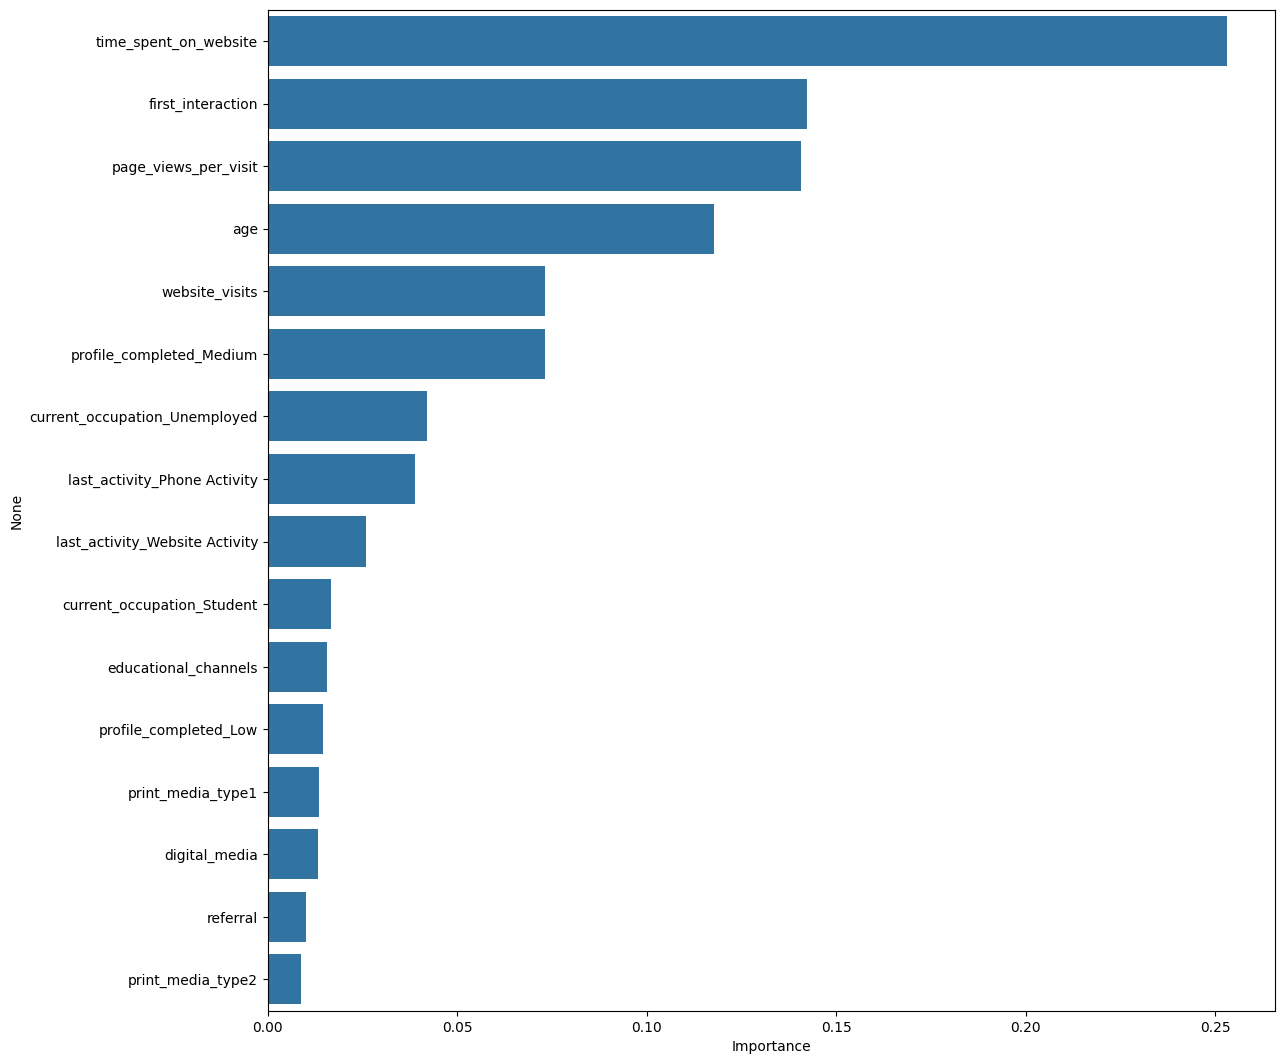

In [ ]:
importances = rf_estimator.feature_importances_

columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

## Do we need to prune the tree?

Since the model is overfitting the data, we can consider pruning the tree.

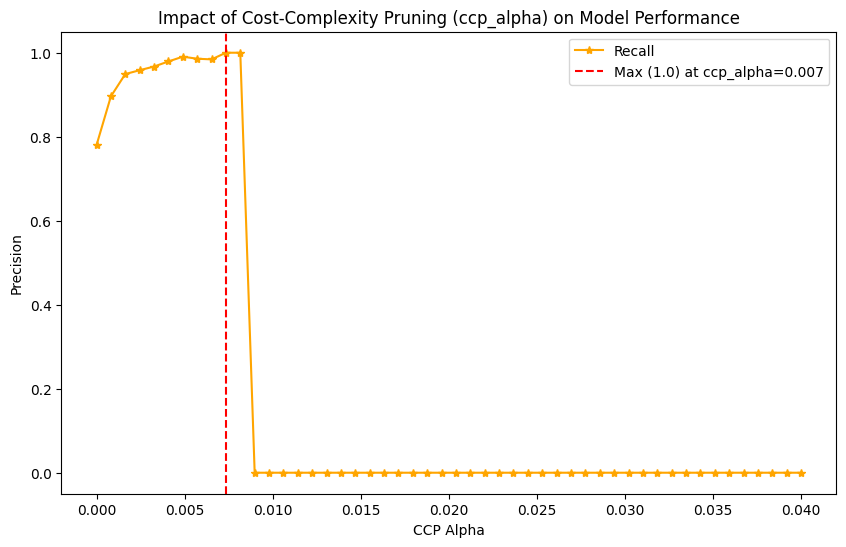

In [ ]:
from sklearn.metrics import precision_score
ccp_alpha_range = np.linspace(0, 0.04, 50)

precision = []

# Train and test random forests for different ccp_alpha values
for ccp_alpha in ccp_alpha_range:
    clf = RandomForestClassifier(class_weight = {0: 0.7015, 1: 0.2985}, ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    precision.append(precision_score(y_test, y_pred))

# Getting max for x and y
max_index = np.argmax(precision)
x_max = ccp_alpha_range[max_index]


# Plot the results
plt.figure(figsize=(10,6))
plt.plot(ccp_alpha_range, precision, color='orange', marker='*', label="Recall")
plt.axvline(x=x_max, color='red', linestyle='--', label=f'Max ({round(np.max(precision), 4)}) at ccp_alpha={round(x_max, 3)}')

plt.xlabel('CCP Alpha')
plt.ylabel('Precision')
plt.title('Impact of Cost-Complexity Pruning (ccp_alpha) on Model Performance')
plt.legend()
plt.show()

In [ ]:
# Fitting the Random Forest classifier on the training data
p_rf_estimator = RandomForestClassifier(class_weight = {0: 0.7015, 1: 0.2985}, ccp_alpha=0.007, random_state = 42)
p_rf_estimator.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.007, class_weight={0: 0.7015, 1: 0.2985},
                       random_state=42)

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      2264
           1       1.00      0.19      0.32       964

    accuracy                           0.76      3228
   macro avg       0.87      0.60      0.59      3228
weighted avg       0.82      0.76      0.69      3228



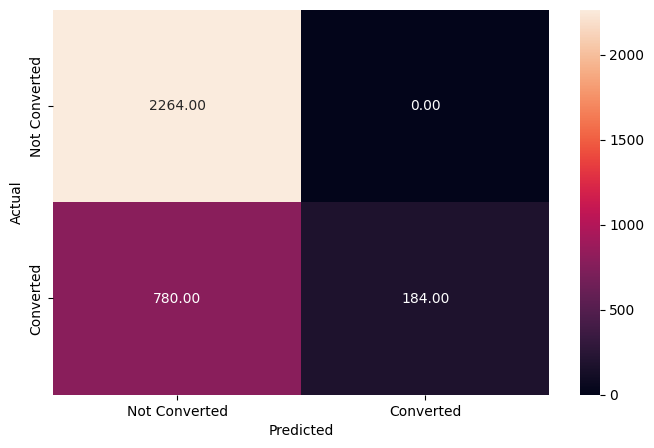

In [ ]:
# Checking performance on the training data
y_pred_train_rf = p_rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85       971
           1       0.98      0.15      0.26       413

    accuracy                           0.75      1384
   macro avg       0.86      0.57      0.55      1384
weighted avg       0.81      0.75      0.67      1384



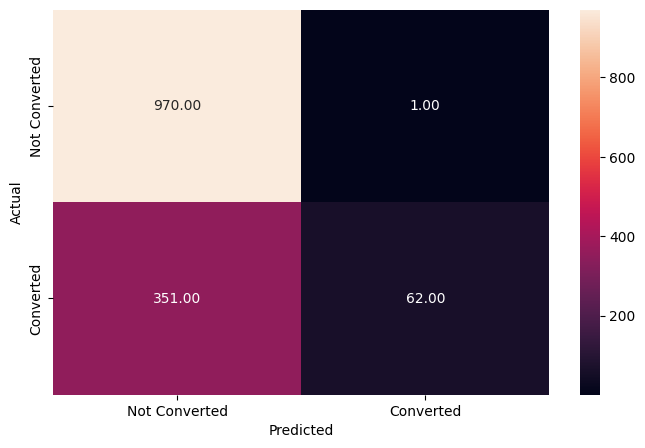

In [ ]:
# Checking performance on the test dataset
y_test_pred_dt = p_rf_estimator.predict(X_test)
metrics_score(y_test, y_test_pred_dt)

**Observations:**

- The pruned random forest works well on the training data, and  **also well on the test data** as the precision is 98% in comparison to 100% for the training dataset. Thus, The model has **similar performance on the test and train data**, therefore we're confident that the model is generalising.
- Besides, note that the recall is very small, indicatting a higher number of false.Howver, we do not care since our goal was to effectively detect leads that are likely to convert in paid customers.

<Axes: xlabel='Importance', ylabel='None'>

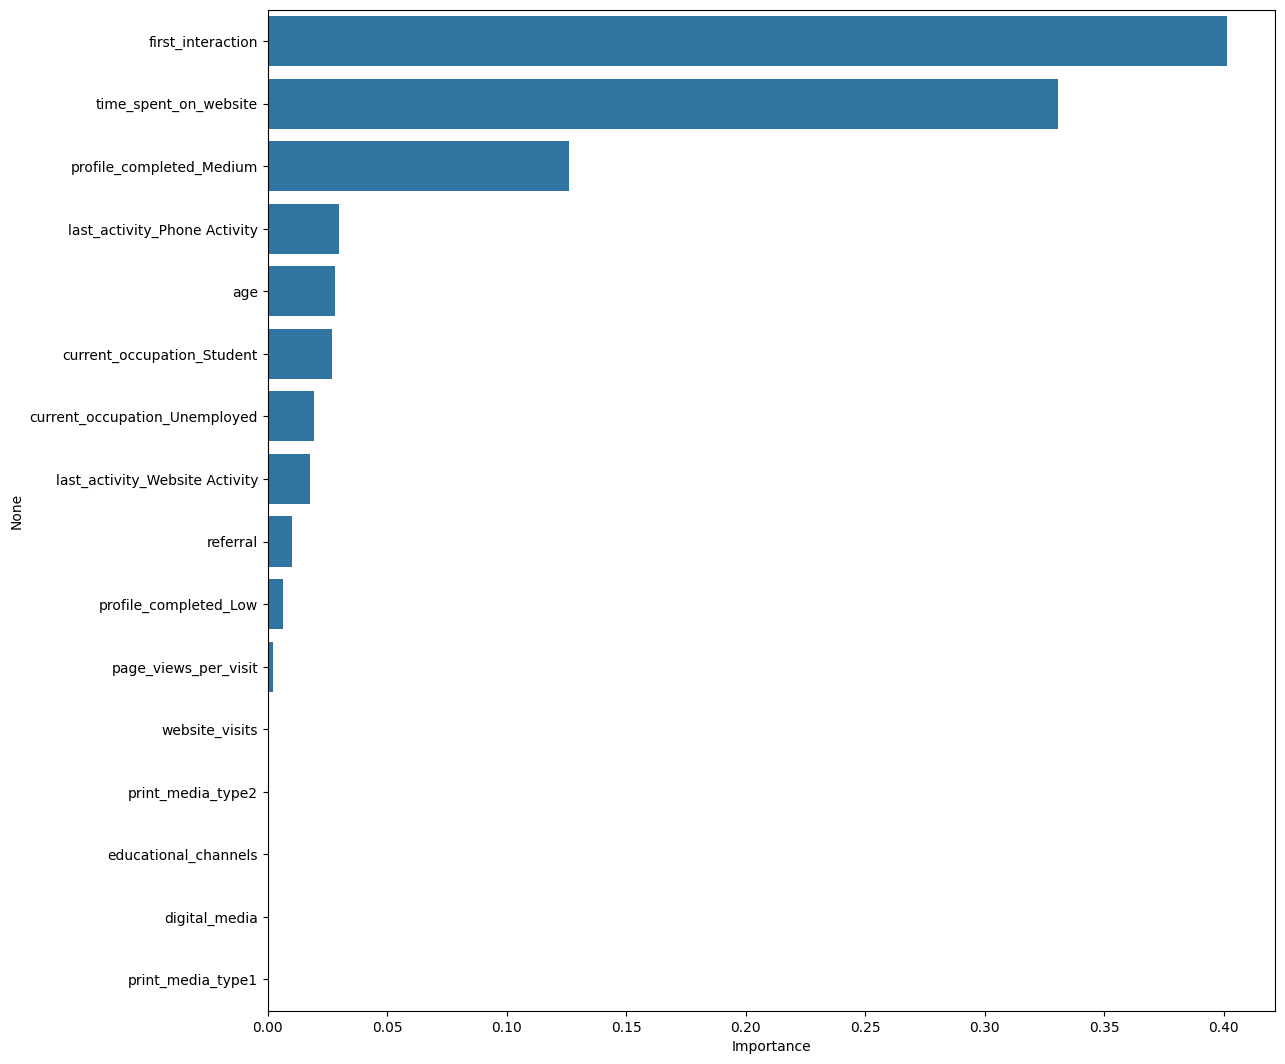

In [ ]:
importances = p_rf_estimator.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(x=importance_df.Importance, y=importance_df.index)

**Observations:**

- According to the pruned Random Forest, **first_interaction is the most important feature, followed by time_spent_on_website, Profile_completed_medium, last_activity_phone, and Age.**
- This might signify that leads who are likely to convert in paid customers have spent more time on the website, have first interaction via the website, are unemployed and have completed at leat 50% of their profile information.
- The other important features are `Current_occupation_student`, `current_occupation_unemployed `.
- It is worth noting that the features recommendations are quite similar to the one suggested by the pruned decision tree.

## Actionable Insights and Recommendations

**Actionable insights:**

The profile of a lead that is likely to be converted in paid customers is the ones who:
- have first interacted with the company via a website;
- have spent a larger amount of time on the company  website;
- have completed at least 50% of their profile information;
- have a phone conversation with a representative of the company;
- are unemployed, student.

**Recommendations:**
We will suggest to ExtraaLearn to prioritize marketing strategies via website ad that will be targeting people who does not have a job, or students. Once a lead has been identified, it is advisable to have an interaction with him/her via a phone call, instead to reach out via mail.